<a href="https://colab.research.google.com/github/sajith-91/MACHINE-LEARNING-MODELS/blob/main/AIRLINE_PASSENGER_REFFERAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AIRLINE PASSENGER REFFERAL PRDICTION


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** -SAJITH VARGHESE
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

THIS DATA CONTAINS AIRLINE NAME,OVERALL SCORE,AUTHOR ,REVIEW DATE,CUSTOMER REVIEW,AIRCRAFT,TRAVELLER TYPE,CABIN,ROUTE,DATE FLOWN,SEAT COMFORT,CABIN SERVICE,SCORES OF FOOD AND BEVERAGES ,ENTERTAINMENT,GROUND SERVICE,VALUE FOR MONEY,RECOMMENDED INCLUDED.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**THE MAIN OBJECTIVE OF THIS PROJECT IS TO PREDICT THE PASSENGER WILL REFFER THE AIRLINE TO THEIR FRIENDS OR NOT

ALSO VISUALIZE 1)TOP 10 AIRLINE WITH RESPECT TO OVERALL POINTS 2)WHICH AIRLINE GOOD IN FOOD BEVERAGES SERVICES? AND FINDING ASSUMPTION FOR 3)IS CABIN SCORE DETERMINANT OF RECOMMENADATION?**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

### Dataset Loading

In [2]:
# Load Dataset\
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/ALMA BETTER/module 4/classification/capstone project/data_airline_reviews.xlsx")

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First view
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [8]:
# Visualizing the missing values

### What did you know about your dataset?

in the main dataset,70711 duplicated rows are here out of 1,31,895 rows.11 columns are here.null values count different in different columns.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include='all')

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,65947,64017.000000,65947,65947,65947,19718,39755,63303,39726,39633,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000,64440
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,On March 2/14 a friend and I were booked on an...,A320,Solo Leisure,Economy Class,Bangkok to Hong Kong,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2934,NaN,96,253,6,2157,14798,48558,35,1204,NaN,NaN,NaN,NaN,NaN,NaN,33894
mean,NaN,5.145430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962,NaN
std,NaN,3.477532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


### Variables Description 

HERE 'RECOMMEDATION' CONSIDERING AS THE DEPENDENT VARIABLE.ALL OTHER CONSIDERING AS INDEPENDENT VARIABLES.VARIABLES (author,review_date,	customer_review,aircraft) ARE NOT NEEDED FOR THIS PROJECT.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df['airline'].unique()

array([nan, 'Turkish Airlines', 'Qatar Airways', 'Emirates', 'Lufthansa',
       'KLM Royal Dutch Airlines', 'Virgin America', 'American Airlines',
       'Delta Air Lines', 'Southwest Airlines', 'United Airlines',
       'Jetblue Airways', 'Aegean Airlines', 'Aeroflot Russian Airlines',
       'Aeromexico', 'Air Canada', 'Air New Zealand', 'Alitalia',
       'AirAsia', 'Asiana Airlines', 'Avianca', 'Austrian Airlines',
       'British Airways', 'Brussels Airlines', 'China Eastern Airlines',
       'China Southern Airlines', 'Copa Airlines', 'Ethiopian Airlines',
       'Egyptair', 'Finnair', 'Iberia', 'ANA All Nippon Airways',
       'easyJet', 'Korean Air', 'LATAM Airlines', 'LOT Polish Airlines',
       'Qantas Airways', 'Air France', 'Etihad Airways',
       'Pegasus Airlines', 'Royal Jordanian Airlines', 'Ryanair',
       'South African Airways', 'Saudi Arabian Airlines', 'TAP Portugal',
       'Eurowings', 'EVA Air', 'Royal Air Maroc', 'Singapore Airlines',
       'SAS Scandinavi

In [12]:
df['overall'].unique()

array([nan,  7.,  2.,  3., 10.,  1.,  6.,  8.,  5.,  4.,  9.])

In [13]:
df['author'].unique()

array([nan, 'Christopher Hackley', 'Adriana Pisoi', ...,
       'Andriy Yesypenko', 'Volodya Bilotkach', 'Kasper Hettinga'],
      dtype=object)

In [14]:
df['review_date'].unique()

array([nan, '8th May 2019', '7th May 2019', ..., '19th May 2006',
       '29th April 2006', '10th February 2006'], dtype=object)

In [15]:
df['customer_review'].unique()

array([nan,
       'âœ… Trip Verified | London to Izmir via Istanbul. First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think thei

In [16]:
df['aircraft'].unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [17]:
df['traveller_type'].unique()

array([nan, 'Business', 'Family Leisure', 'Solo Leisure',
       'Couple Leisure'], dtype=object)

In [18]:
df['cabin'].unique()

array([nan, 'Economy Class', 'Business Class', 'Premium Economy',
       'First Class'], dtype=object)

In [19]:
df['route'].unique()

array([nan, 'London to Izmir via Istanbul', 'Istanbul to Bucharest', ...,
       'KBP to VNO', 'Athens to JFK via Kiev', 'Beijing to Kiev'],
      dtype=object)

In [20]:
df['date_flown'].unique()

array([nan, datetime.datetime(2019, 5, 1, 0, 0), 'April 2019',
       'February 2019', 'October 2018', 'March 2019', 'September 2018',
       'April 2018', 'January 2019', 'November 2018', 'December 2018',
       datetime.datetime(2018, 5, 1, 0, 0), 'August 2018', 'July 2018',
       'March 2018', 'June 2018', 'January 2018', 'August 2017',
       'December 2017', datetime.datetime(2017, 5, 1, 0, 0),
       'February 2018', 'September 2017', 'November 2017', 'January 2017',
       'October 2017', 'July 2017', 'November 2016', 'June 2017',
       'April 2017', 'June 2016', 'March 2017', 'December 2016',
       'August 2016', 'February 2017', 'October 2016', 'September 2016',
       'March 2016', datetime.datetime(2016, 5, 1, 0, 0), 'December 2015',
       'July 2016', 'February 2016', 'August 2015', 'April 2016',
       'January 2016', 'September 2015',
       datetime.datetime(2015, 5, 1, 0, 0), 'November 2015', 'July 2015',
       'February 2015', 'October 2015', 'June 2015', 'Decembe

In [21]:
df['cabin_service'].unique()

array([nan,  5.,  1.,  4.,  3.,  2.])

In [22]:
df['seat_comfort'].unique()

array([nan,  4.,  1.,  3.,  2.,  5.])

In [23]:
df['food_bev'].unique()

array([nan,  4.,  1.,  5.,  2.,  3.])

In [24]:
df['entertainment'].unique()

array([nan,  4.,  1.,  3.,  5.,  2.])

In [25]:
df['ground_service'].unique()

array([nan,  2.,  1.,  5.,  3.,  4.])

In [26]:
df['value_for_money'].unique()

array([nan,  4.,  1.,  2.,  5.,  3.])

In [27]:
df['recommended'].unique()

array([nan, 'yes', 'no'], dtype=object)

##  ***Data Wrangling***

### Data Wrangling Code

In [28]:
# Write your code to make your dataset analysis ready.
#remove null values,removing duplicatae values
df=df[~df.duplicated()]
df.shape

(61184, 17)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

In [30]:
df=df.tail(-1)

In [31]:
#removing unnecessary variables
df1=df.drop([ 'author', 'review_date', 'customer_review',
       'date_flown','aircraft','route'],axis=1)

### What all manipulations have you done and insights you found?

Answer Here.

## *** Feature Engineering & Data Pre-processing***

###  Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value 
def show_missing():
    missing = df1.columns[df1.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df1[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df1[show_missing()].isnull().sum().sort_values(ascending = False)/len(df1)*100,2))
     

Missing Data Count
ground_service     24014
traveller_type     23643
entertainment      20953
food_bev           12842
seat_comfort        4972
cabin_service       4943
cabin               2478
value_for_money     1856
overall             1782
recommended         1422
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
ground_service     39.25
traveller_type     38.64
entertainment      34.25
food_bev           20.99
seat_comfort        8.13
cabin_service       8.08
cabin               4.05
value_for_money     3.03
overall             2.91
recommended         2.32
dtype: float64


In [51]:
# for the columns cabin_service,cabin,overall,recommeded, very few data missed ,so we can remove these data.
df2=df1[~df1['cabin'].isnull()]

In [52]:
df3=df2[~df2['overall'].isnull()]
df4=df3[~df3['recommended'].isnull()]

In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57093 entries, 1 to 131866
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          57093 non-null  object 
 1   overall          57093 non-null  float64
 2   traveller_type   37519 non-null  object 
 3   cabin            57093 non-null  object 
 4   seat_comfort     54145 non-null  float64
 5   cabin_service    54089 non-null  float64
 6   food_bev         46511 non-null  float64
 7   entertainment    38634 non-null  float64
 8   ground_service   37149 non-null  float64
 9   value_for_money  56933 non-null  float64
 10  recommended      57093 non-null  object 
dtypes: float64(7), object(4)
memory usage: 5.2+ MB


In [54]:
def show_missing():
    missing = df4.columns[df4.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df4[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df4[show_missing()].isnull().sum().sort_values(ascending = False)/len(df4)*100,2))
     

Missing Data Count
ground_service     19944
traveller_type     19574
entertainment      18459
food_bev           10582
cabin_service       3004
seat_comfort        2948
value_for_money      160
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
ground_service     34.93
traveller_type     34.28
entertainment      32.33
food_bev           18.53
cabin_service       5.26
seat_comfort        5.16
value_for_money     0.28
dtype: float64


In [55]:
df4['food_bev'] = df4['food_bev'].fillna(df4['food_bev'].mean())
df4['ground_service'] = df4['ground_service'].fillna(df4['ground_service'].mean())
df4['entertainment'] = df4['entertainment'].fillna(df4['entertainment'].mean())
df4['cabin_service'] = df4['cabin_service'].fillna(df4['cabin_service'].mean())
df4['value_for_money'] = df4['value_for_money'].fillna(df4['value_for_money'].mean())
df4['seat_comfort'] = df4['seat_comfort'].fillna(df4['seat_comfort'].mean())
df4['ground_service'] = df4['ground_service'].fillna(df4['ground_service'].mean())
df4['traveller_type'] = df4['traveller_type'].fillna(df4['traveller_type'].ffill(axis=0))





<ipython-input-55-d749864f55bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['food_bev'] = df4['food_bev'].fillna(df4['food_bev'].mean())
<ipython-input-55-d749864f55bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ground_service'] = df4['ground_service'].fillna(df4['ground_service'].mean())
<ipython-input-55-d749864f55bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [56]:
def show_missing():
    missing = df4.columns[df4.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df4[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df4[show_missing()].isnull().sum().sort_values(ascending = False)/len(df4)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [57]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57093 entries, 1 to 131866
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          57093 non-null  object 
 1   overall          57093 non-null  float64
 2   traveller_type   57093 non-null  object 
 3   cabin            57093 non-null  object 
 4   seat_comfort     57093 non-null  float64
 5   cabin_service    57093 non-null  float64
 6   food_bev         57093 non-null  float64
 7   entertainment    57093 non-null  float64
 8   ground_service   57093 non-null  float64
 9   value_for_money  57093 non-null  float64
 10  recommended      57093 non-null  object 
dtypes: float64(7), object(4)
memory usage: 5.2+ MB


In [58]:
df4.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


#### What all missing value imputation techniques have you used and why did you use those techniques?

VERY FEW MISSING VALUE COLUMNS REMOVED AND OTHER NUMERICAL COLUMNS FILLED WITH MEAN VALUE.TRAVELLER TYPE COLUMN NULL VALUES FILLED WITH PREVIOUS ONE(BECAUSE THERE IS HIGH CHANCE FOR PASSENGER TRAVELLING IN GROUPS)

In [59]:
proj_df=df4.drop(['traveller_type'],axis=1)


In [60]:
proj_df.head()

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


###  Handling Outliers

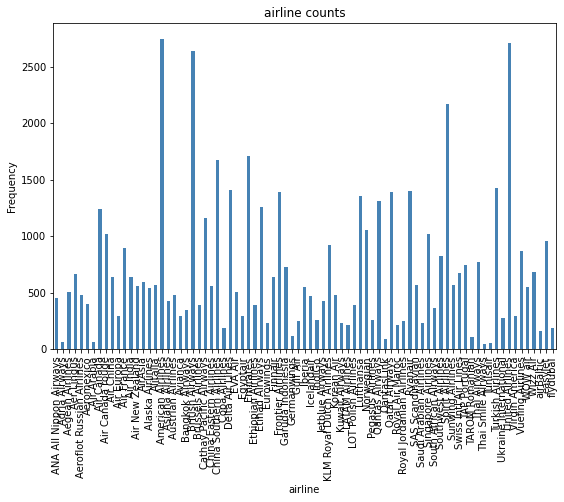

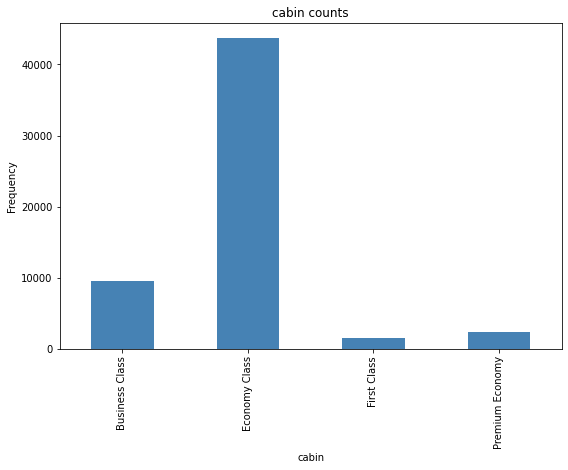

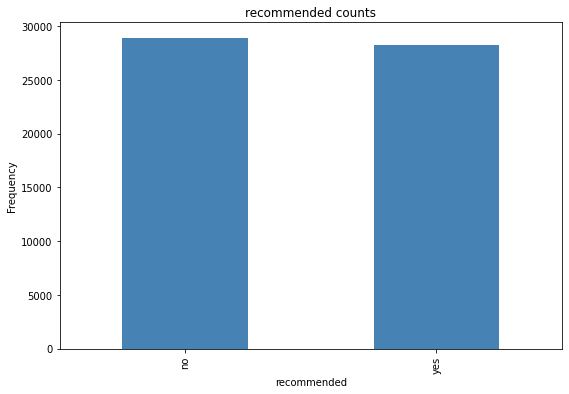

In [61]:
# Handling Outliers & Outlier treatments
categorical_features = proj_df.describe(include=['object','category']).columns
    
for col in categorical_features:
  counts = proj_df[col].value_counts().sort_index()
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  counts.plot.bar(ax = ax, color='steelblue')
  ax.set_title(col + ' counts')
  ax.set_xlabel(col) 
  ax.set_ylabel("Frequency")
plt.show()

graph shows that the some airline have few counts.so less than 100 value counts considering as outliers and removing this.

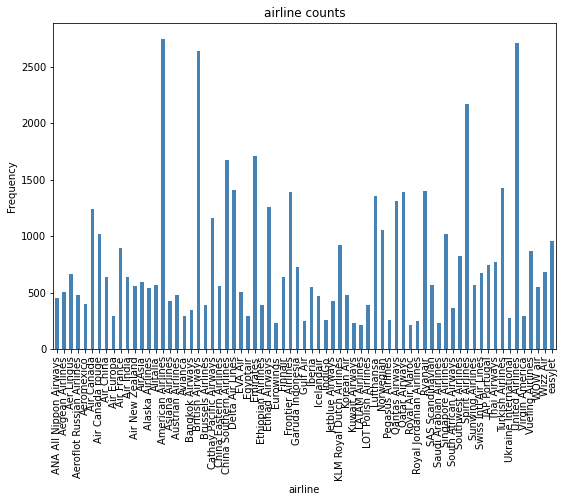

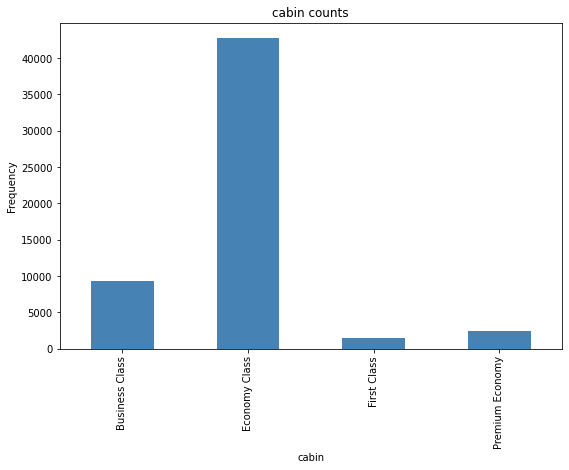

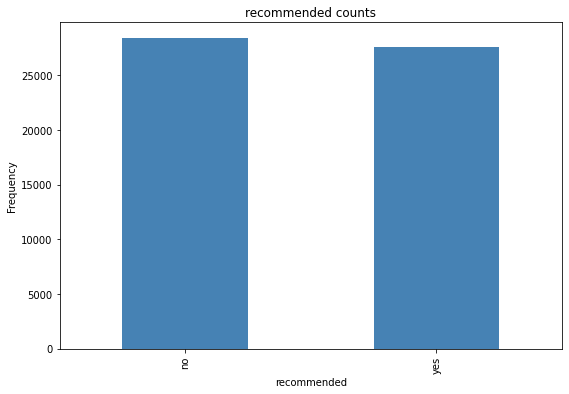

In [62]:
proj_df=proj_df.groupby('airline').filter(lambda x:len(x)>200)


categorical_features = proj_df.describe(include=['object','category']).columns
    
for col in categorical_features:
  counts = proj_df[col].value_counts().sort_index()
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  counts.plot.bar(ax = ax, color='steelblue')
  ax.set_title(col + ' counts')
  ax.set_xlabel(col) 
  ax.set_ylabel("Frequency")
plt.show()

In [63]:
features=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']

**categorical encoding**

In [64]:
# Encode your categorical columns
change={'yes':1,"no":0}

proj_df['recommend']=proj_df['recommended'].map(change)
proj_df=proj_df.drop(['recommended'],axis=1)
proj_df=pd.get_dummies(proj_df,columns=['cabin'])

proj_df.head()

,airline,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommend,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,Turkish Airlines,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1,0,1,0,0
3,Turkish Airlines,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0
5,Turkish Airlines,3.0,1.0,4.0,1.0,3.0,1.0,2.0,0,0,1,0,0
7,Turkish Airlines,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1,0,1,0,0
9,Turkish Airlines,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0


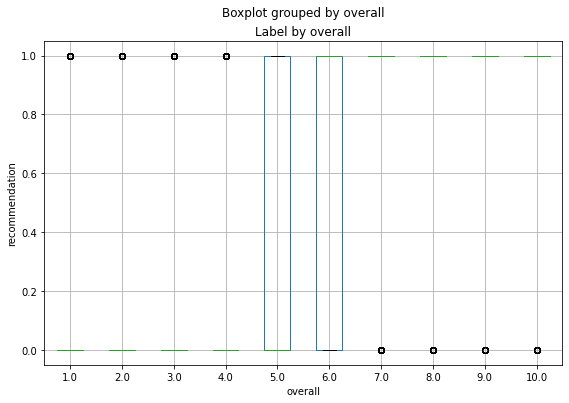

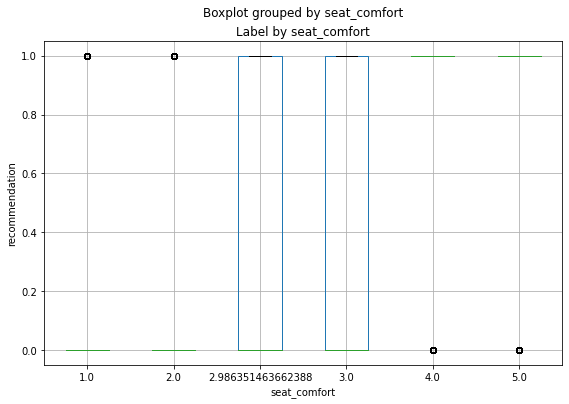

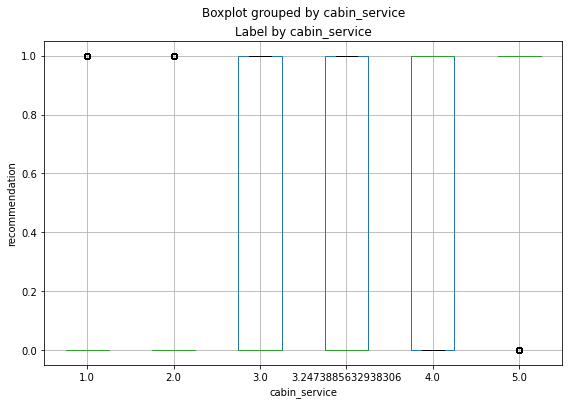

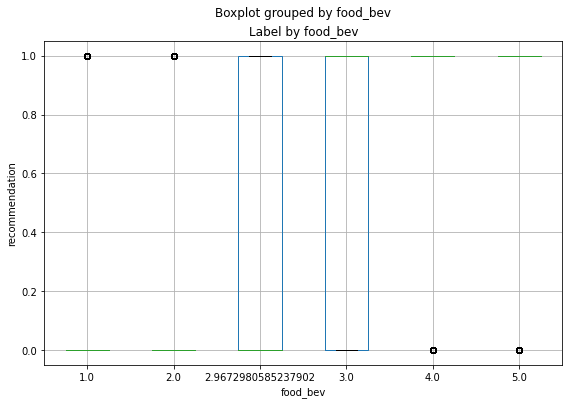

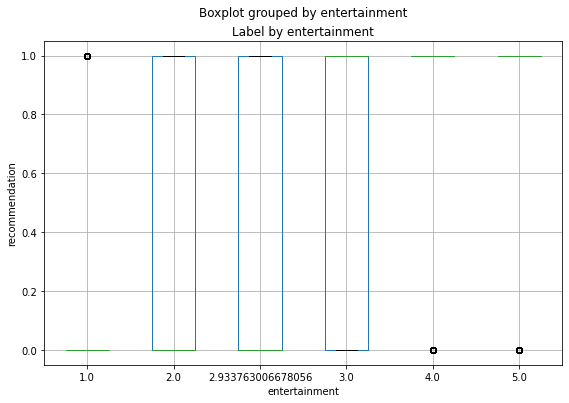

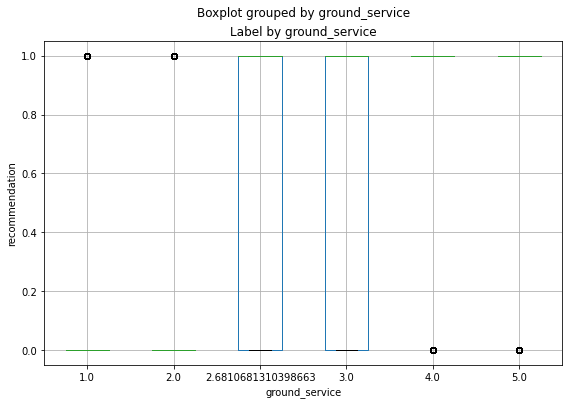

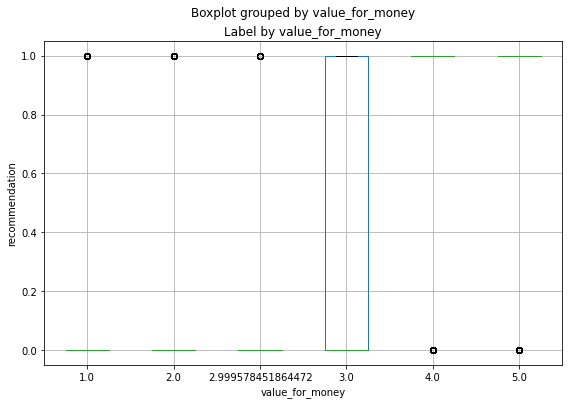

In [65]:
# plot a boxplot for the label by each numerical features feature  

for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    proj_df.boxplot(column = 'recommend', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("recommendation")
plt.show()

In [66]:
proj_df.columns

Index(['airline', 'overall', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommend',
       'cabin_Business Class', 'cabin_Economy Class', 'cabin_First Class',
       'cabin_Premium Economy'],
      dtype='object')

for numerical columns in this dataset,we can't remove outliers,because if it do so,wel will lose huge data

In [67]:
proj_df.shape

(56009, 13)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

VARIABLES (author	review_date	customer_review	aircraft) ARE REMOVED.BECAUSE IT NOT NEEDED FOR THIS PROJECT

In [84]:
# DImensionality Reduction (If needed)
#we want to remove one column from the encoded columns because of removing variable trap.
proj_df=proj_df.drop(['cabin_Premium Economy'],axis=1)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

dropped one variable from dataset

###  Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [86]:
proj_df['recommend'].value_counts()

0    28404
1    27605
Name: recommend, dtype: int64

<AxesSubplot:xlabel='recommend', ylabel='count'>

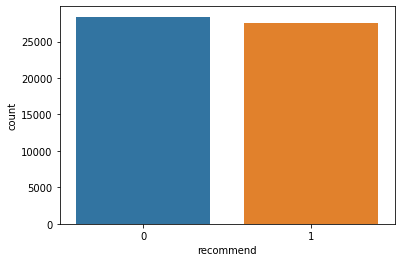

In [87]:
sns.countplot(x=proj_df['recommend'])

the figure shows that no need to balance the dataset.because our dependent variable is already balanced.

In [88]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

##*** Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart - 1

<AxesSubplot:xlabel='recommend', ylabel='count'>

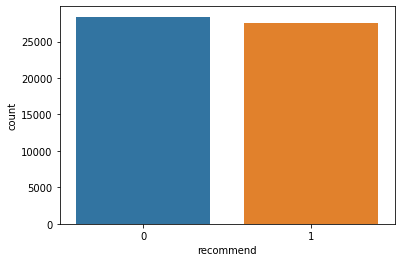

In [89]:
# Chart - 1 visualization code
sns.countplot(x=proj_df['recommend'])

1. Why did you pick the specific chart?


THIS DATA SHOWS HOW DATA IS UNBALANCED

What is/are the insight(s) found from the chart?

IT ALREADY BALANCED SO NO NEED TO BALANCE

CHART 2

In [90]:
# Chart - 2 visualization code
df4['airline'].value_counts()


American Airlines     2750
United Airlines       2712
British Airways       2638
Spirit Airlines       2169
Emirates              1715
                      ... 
QantasLink              91
Air Arabia              64
Adria Airways           62
Tunisair                52
Thai Smile Airways      47
Name: airline, Length: 81, dtype: int64

In [91]:
ser=proj_df.groupby('airline')['overall'].mean().sort_values(ascending=False)[:10]
ser

airline
Garuda Indonesia           8.280055
EVA Air                    8.071287
Asiana Airlines            8.062791
ANA All Nippon Airways     7.868421
China Southern Airlines    7.791393
Aegean Airlines            7.776471
Korean Air                 7.632568
Bangkok Airways            7.594286
Qatar Airways              7.518332
Singapore Airlines         7.464706
Name: overall, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

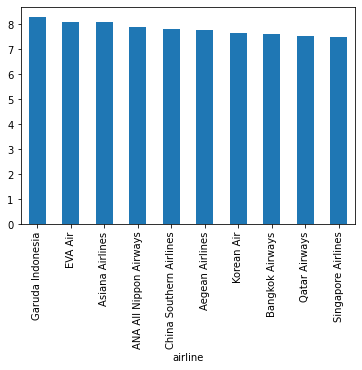

In [92]:
ser.plot(kind='bar')
plt.show

1. Why did you pick the specific chart?

bar chart is best plotting the best top 10 airline based on the overall points.in this garuda indonesia is the best airline based on the overall points.

 2. What is/are the insight(s) found from the chart?

garuda indonesia isthe best airline on the basis of overall points.followed positions are held by eva air,asiana airlines,ana all nippon airways,etc.

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

THIS WILL HELP TO FUTURE ANALYSIS.LIKE WHICH AIRLINE HAVE TO GIVE MORE PROMOTIONS AND WHICH NEED TO MORE DISCOUNTS

Chart - 3

<function matplotlib.pyplot.show(close=None, block=None)>

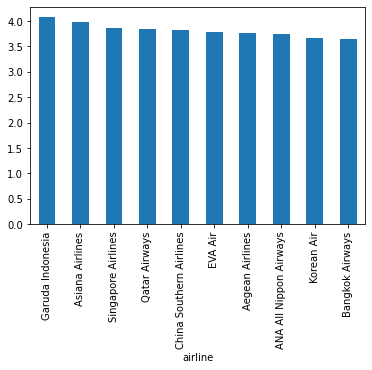

In [93]:
# Chart - 3 visualization code
good_bev=proj_df.groupby('airline')['food_bev'].mean().sort_values(ascending=False)[:10]
good_bev.plot(kind='bar')
plt.show

1. Why did you pick the specific chart?

Answer Here.

to find the best airline on the basis of food and beverages

2. What is/are the insight(s) found from the chart?


garuda indonesia holds the fist position,followed by asiana airline,singapore airlines

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

IT WILL HELP TO KNOW WHAT METHODS ARE USED BY THE TOP POSITION HOLDERS,SIMILARLY WHAT ARE THE DRAWBACKS OF THE AIRLINES WHO SCORE LESS.

Chart - 4

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recommend', ylabel='Density'>

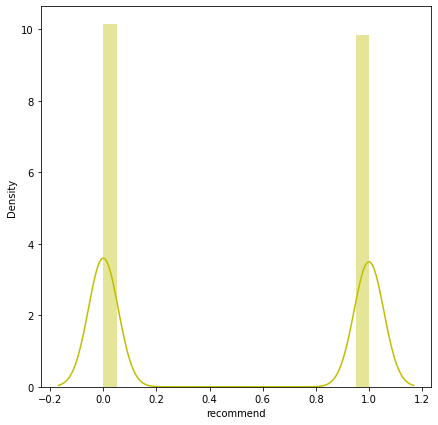

In [94]:
plt.figure(figsize=(7,7))
sns.distplot(proj_df['recommend'],color="y")

1. Why did you pick the specific chart?

THIS WILL HELP TO HOW DATA IS DISTRIBUTED

2. What is/are the insight(s) found from the chart?

DATA IS UNIFORMLY DISTRIBUTED

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

IT WILL HELP TO FIND MACHINE LEARNING ALGORITHM CAN USE

Chart - 5

<AxesSubplot:>

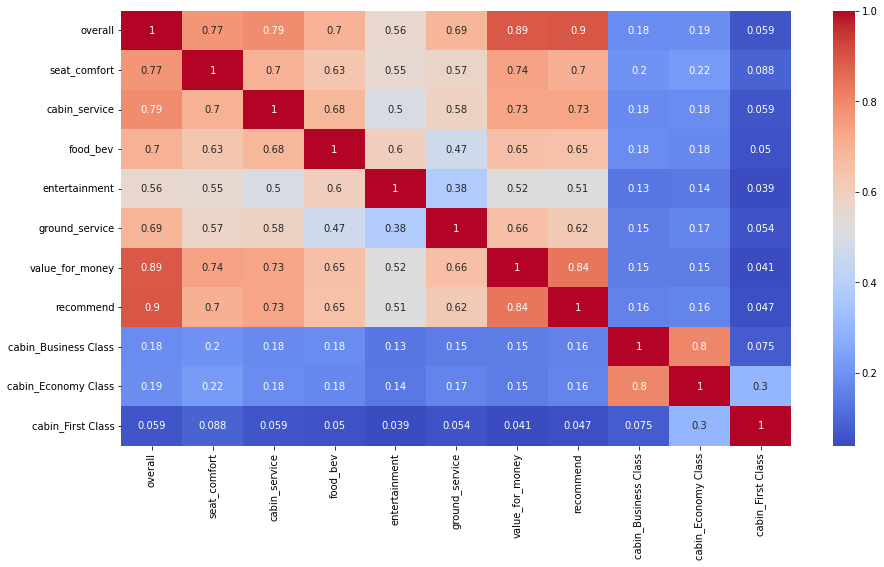

In [95]:
 #Chart - 5 visualization code
plt.figure(figsize=(15,8))
correlation = proj_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

1. Why did you pick the specific chart?

IT WILL HELP TO FIND THE CORRELATION BETWEEN VARIABLES

2. What is/are the insight(s) found from the chart?

WE GET THE CORRELATION BETWEEN EACH VARIABLE

 Chart - 6

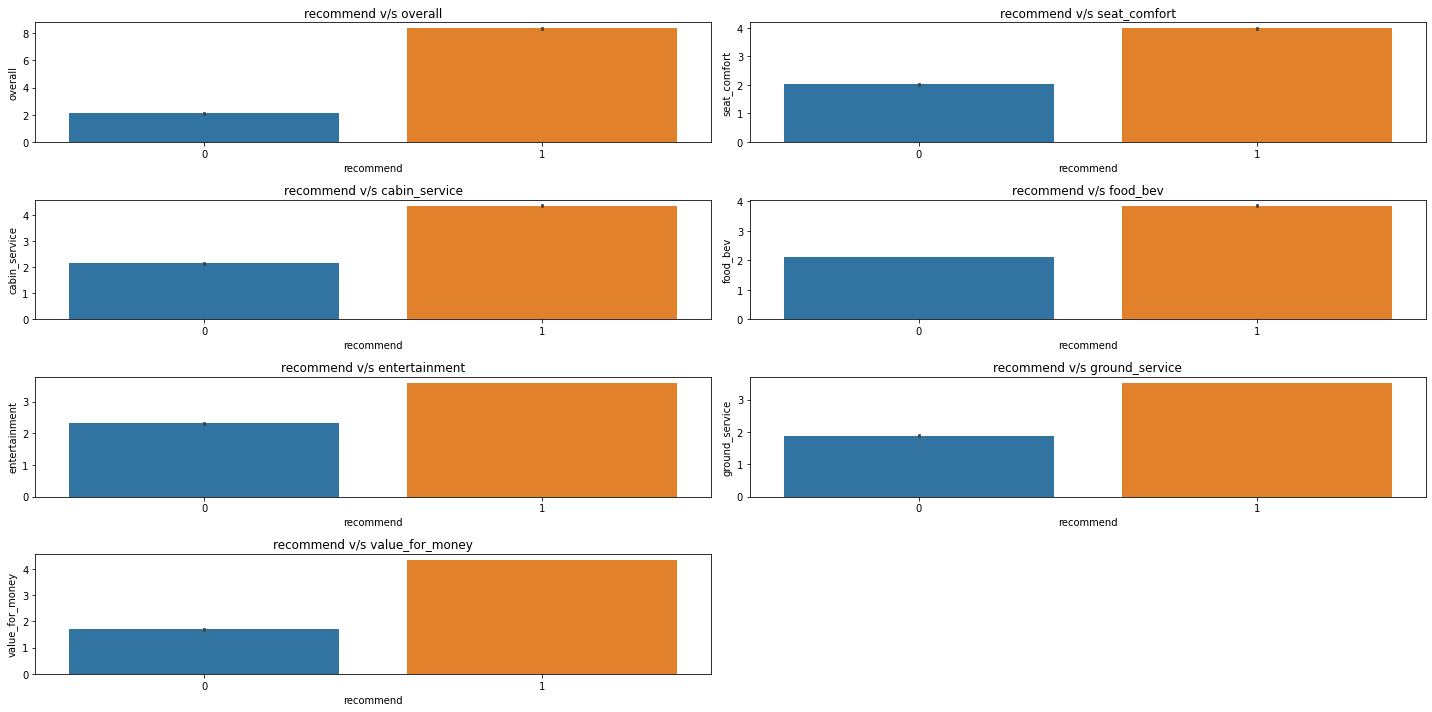

In [96]:
 #Chart - 6 visualization code
 # plotting  recommend vs other fearures
plt.figure(figsize=(20,10))

#labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=4   
cols=2
counter=1

variables=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=proj_df['recommend'],y=proj_df[var])
  plt.title(f'recommend v/s {var}')
  counter=counter+1
  plt.tight_layout()

1. Why did you pick the specific chart?

to show the relation with the recommend for each variables.

2. What is/are the insight(s) found from the chart?

from the graph, we can assume that the person suggested score point less than 2 will not recommend the airline 

Chart - 7

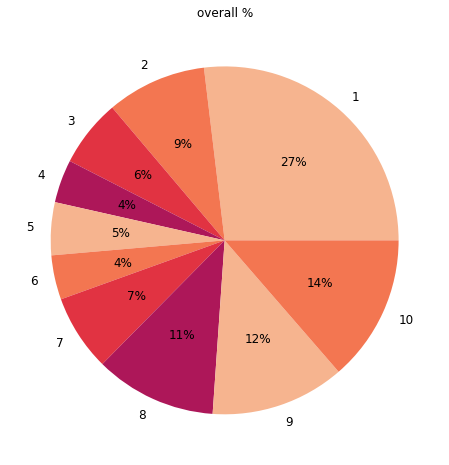

In [97]:
# Chart - 7 visualization code
fig = plt.figure(1, figsize=(8,8))
#data = [(len(proj_df[df.price_range==0])),(len(df[df.price_range==1])),(len(df[df.price_range==2])),(len(df[df.price_range==3])) ]
data=[]
keys=[]
for i in range(1,11):
  data.append(len(proj_df[proj_df['overall']==i]))
  keys.append(i)
#keys = ['Low Cost', 'Medium cost', 'High Cost', 'Very High Cost']
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')[0:4]
plt.pie(data, labels=keys, colors=palette_color, autopct='%.00f%%',textprops={'fontsize': 12})
plt.title('overall %')
plt.show()

1. Why did you pick the specific chart?

to find the percentage of people overall score point

2. What is/are the insight(s) found from the chart?

27 % people give very low ovarall score.at the same time 27% people give very high overall score like,8,9,10

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it will help to business growth

In [98]:
proj_df=proj_df.drop(['airline'],axis=1)

In [99]:
X=proj_df.drop(['recommend'],axis=1)
Y=proj_df['recommend']
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

(42006, 10) (42006,)


In [100]:
print(X_test.shape, Y_test.shape)

(14003, 10) (14003,)


## ***7. ML Model Implementation***

### ML Model - 1

**RANDOM FOREST**

In [101]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier

# Fit the Algorithm
rlf=RandomForestClassifier(n_estimators=100)
rlf.fit(X_train,Y_train)
# Predict on the model
Y_pred=rlf.predict(X_test)
Y_train_pred=rlf.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [102]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [103]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,Y_train_pred)
test_accuracy = accuracy_score(Y_test,Y_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9909298671618341
The accuracy on test dataset is 0.9542240948368207


In [104]:
train_cm = confusion_matrix(Y_train,Y_train_pred)
test_cm = confusion_matrix(Y_test,Y_pred )

In [108]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,Y_train_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21210
           1       0.99      0.99      0.99     20796

    accuracy                           0.99     42006
   macro avg       0.99      0.99      0.99     42006
weighted avg       0.99      0.99      0.99     42006



              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7194
           1       0.95      0.95      0.95      6809

    accuracy                           0.95     14003
   macro avg       0.95      0.95      0.95     14003
weighted avg       0.95      0.95      0.95     14003



In [109]:
test_cm

array([[6886,  308],
       [ 333, 6476]])

In [110]:
precision=(6482/(6482+320))
precision

0.9529550132314025

In [111]:
recall=(6482/(6482+327))
recall

0.9519753267733881

In [112]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,Y_train_pred)
test_auc = roc_auc_score(Y_test,Y_pred)

In [113]:
train_auc

0.9909259355990829

In [114]:
train_auc

0.9909259355990829

#### 2. Cross- Validation & Hyperparameter Tuning

GRIDSEARCHCV

In [115]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
# Fit the Algorithm
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

# Predict on the model

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [116]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [117]:
rf_optimal_model = rf_grid.best_estimator_

In [118]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [119]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [120]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)
print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9570775603485216
The accuracy on test dataset is 0.9589373705634507


In [121]:
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [122]:
train_cm

array([[20425,   785],
       [ 1018, 19778]])

In [123]:
test_cm

array([[6932,  262],
       [ 313, 6496]])

In [124]:
precision=(6507/(6507+268))
precision

0.9604428044280443

In [125]:
recall=(6507/(6507+302))
recall

0.9556469378763401

In [126]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds)
test_auc = roc_auc_score(Y_test,test_preds)

In [127]:
train_auc

0.992310870585039

##### Which hyperparameter optimization technique have you used and why?

GRIDSEARCHCV IS USED FOR OPTIMIZATION

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

VERY MINIMAL PROGRESS IN THE CASE OF HYPER PARAMETER OPTIMIZATION

### ML Model - 2
SVC

In [136]:
# ML Model - 3 Implementationfrom sklearn import svm
from sklearn import svm
clf = svm.SVC()

# Fit the Algorithm
clf.fit(X,Y)

# Predict on the model
train_pred=clf.predict(X_train)
test_pred=clf.predict(X_test)
# Print the classification report for train and test
from sklearn.metrics import classification_report
print(classification_report(Y_train,train_pred))
print("\n")
print(classification_report(Y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     21210
           1       0.96      0.95      0.96     20796

    accuracy                           0.96     42006
   macro avg       0.96      0.96      0.96     42006
weighted avg       0.96      0.96      0.96     42006



              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7194
           1       0.96      0.96      0.96      6809

    accuracy                           0.96     14003
   macro avg       0.96      0.96      0.96     14003
weighted avg       0.96      0.96      0.96     14003



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [137]:
# Visualizing evaluation Metric Score chart
# Confusion matrices for train and test 

print(confusion_matrix(Y_train,train_pred))
print(confusion_matrix(Y_test,test_pred))

[[20370   840]
 [  981 19815]]
[[6919  275]
 [ 298 6511]]


In [138]:
from sklearn import datasets, metrics, model_selection, svm  


#### 2. Cross- Validation & Hyperparameter Tuning
GRIDSEARCHCV

In [139]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV 
param_dict = {'C': [1],  
              'gamma': [1], 
              'kernel': ['rbf']} 
grid = GridSearchCV(clf, param_dict,n_jobs=2, cv=5, verbose = 10,scoring='accuracy')
# Fit the Algorithm
grid.fit(X_train,Y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [1], 'gamma': [1], 'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [140]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [141]:
gridtf_train_pred=grid.predict(X_train)

In [142]:
gridtf_test_pred=grid.predict(X_test)

In [143]:
# Confusion matrices for train and test 

print(confusion_matrix(Y_train,gridtf_train_pred))
print(confusion_matrix(Y_test,gridtf_test_pred))

[[20830   380]
 [  432 20364]]
[[6909  285]
 [ 367 6442]]


HYPER PARAMETER ARE {'C': [0.1, 1, 10, 1000],
'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf','linear','poly']}
DUE TO HIGH COMPUTATIONAL TIME,ONLY BEST PARAMETERS ARE CODED HERE

In [144]:
# Print the classification report for train and test
from sklearn.metrics import classification_report
print(classification_report(Y_train,gridtf_train_pred))
print("\n")
print(classification_report(Y_test,gridtf_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     21210
           1       0.98      0.98      0.98     20796

    accuracy                           0.98     42006
   macro avg       0.98      0.98      0.98     42006
weighted avg       0.98      0.98      0.98     42006



              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7194
           1       0.96      0.95      0.95      6809

    accuracy                           0.95     14003
   macro avg       0.95      0.95      0.95     14003
weighted avg       0.95      0.95      0.95     14003



HYPER PARAMETER ARE{'C': [0.1, 1, 10, 1000],
'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf','linear','poly']}


##### Which hyperparameter optimization technique have you used and why?

GRIDSEARCHCV IS USED FOR HYPERPARAMETER OPTIMIZATION

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

MINIMAL IMPROVEMENT ,WHEN USING HYPERPARAMETER OPTIMIZATION

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [148]:
# ML Model - 3 Implementation
from sklearn.linear_model import LogisticRegression

llf = LogisticRegression(fit_intercept=True, max_iter=10000)


# Fit the Algorithm
llf.fit(X_train, Y_train)
# Predict on the model

LogisticRegression(max_iter=10000)

In [149]:
llf.coef_

array([[0.98249855, 0.18651368, 0.30036966, 0.18669634, 0.12182022,
        0.2297659 , 0.73003405, 0.32143966, 0.36577567, 0.43633497]])

In [150]:
llf.intercept_

array([-10.94142599])

In [151]:
y_pred = llf.predict(X_test)
y_pred_train = llf.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [152]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_train, Y_train)
print(accur)

0.9558396419559111


In [153]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_train, Y_train)
print(accur)

0.9558396419559111


In [154]:
# Visualizing evaluation Metric Score chart
print(metrics.classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7146
           1       0.96      0.95      0.96      6857

    accuracy                           0.96     14003
   macro avg       0.96      0.96      0.96     14003
weighted avg       0.96      0.96      0.96     14003



#### 2. Cross- Validation & Hyperparameter Tuning

In [155]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.956120 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.956120 (0.002808) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.956108 (0.002798) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.956120 (0.002805) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.956114 (0.002752) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.956102 (0.002810) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


##### Which hyperparameter optimization technique have you used and why?

GRIDSEARCHCV IS USED FOR HYPER PARAMETER OPTIMIZATION

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

NO IMPROVEMENT

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

GRIDSEARCHCV IS USED FOR HYPERPARAMETER TUNING

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

HERE ALL MODELS SHOWS 96% ACCURACY.SO FROM THIS MOST SIMPLEST MODEL IS SELECTED FOR THIS PROJECT.ie, LOGISTIC REGRESSION IS USED FOR THE CLASSIFYING THIS PROJECT

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

HERE LOGISTIC REGRESSOR IS SELECTED FOR THE PROJECT.IT IS WHITE BOX MODEL.SO NO NEED TO EXPLAINING TOOLS.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [156]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [157]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1)ACCORDING TO OVERALL POINTS GARUDA INDONESIA AND EVA ARE TOP 2 AIRLINES.
2)ACCORDING TO FOOF AND BEVERAGES SCORE GARUDA INDONESIA AND ASIANA AIRLINES ARE IN THE TOP POSITIONS
3)PEOPLE RECOMMEND AIRLINES WHO GIVES SCORE MORE THAN SCORE 2 FOR OTHER VARIABLES
4)27% OF PEOPLE GIVES 1 FOR OVERALL SCORE.ie,25% OF PASSENGER NEVER RECOMMEND AIRLINE.

### ***THANKS !!!***